# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.24.2'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.datasets import load_boston, load_iris
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.cluster import DBSCAN
set_config(display='diagram')

In [7]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [8]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [55]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [59]:
pca_pipeline = make_pipeline(
                    # eliminar NANs y cambiarlos a numeros
                    #np.nan_to_num(),
                    # primero, normalizar los datos
                    StandardScaler(),
                    # segundo, hacer la PCA
                    PCA(2)             
)

In [60]:
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [61]:
pca = pca_pipeline.named_steps['pca']

In [62]:
transformed_X = pca_pipeline.transform(X)

In [73]:
my_data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
my_data['Class'] = pd.Series(data['target'], name='target')

In [74]:
my_data

,PC1,PC2,Class
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


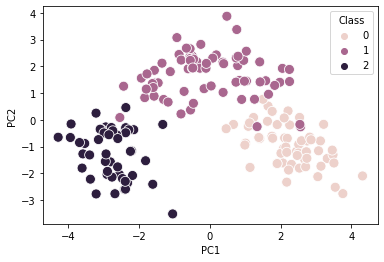

In [75]:
sns.scatterplot('PC1', 'PC2', data=my_data, hue='Class', s=100);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

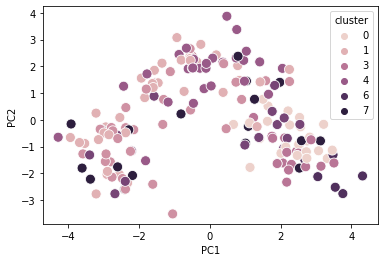

In [79]:
k_means = KMeans(n_clusters=8, random_state=0)

k_means.fit(X)

my_data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=my_data, hue='cluster', s=100)

In [80]:
silhouette_score(transformed_X, labels=k_means.labels_)

-0.1015013220018951

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

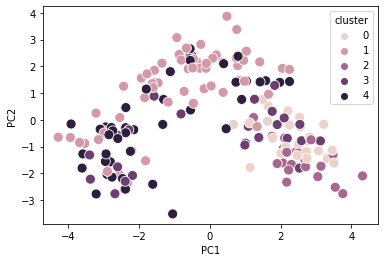

In [81]:
k_means = KMeans(n_clusters=5, random_state=0)

k_means.fit(X)

my_data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=my_data, hue='cluster', s=100)

In [82]:
silhouette_score(transformed_X, labels=k_means.labels_)

-0.015033219798261596

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

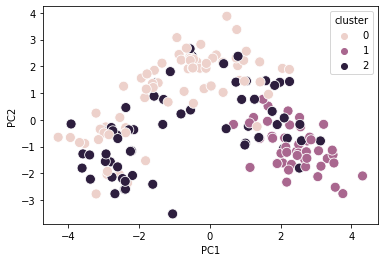

In [83]:
k_means = KMeans(n_clusters=3, random_state=0)

k_means.fit(X)

my_data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=my_data, hue='cluster', s=100)

In [84]:
silhouette_score(transformed_X, labels=k_means.labels_)

0.17011068195701318

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

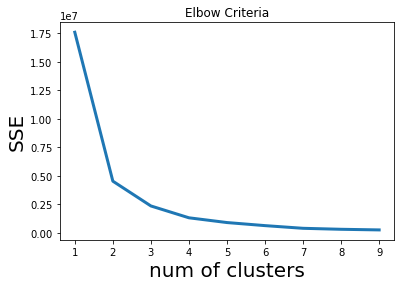

In [85]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(X).inertia_ for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('SSE', size=20)
plt.plot(Ks, score, lw=3)

According to the therory, the best number of cluster to use is 2

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [14]:
clustering = AgglomerativeClustering().fit(X)

In [15]:
clustering

AgglomerativeClustering()

In [16]:
clustering.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

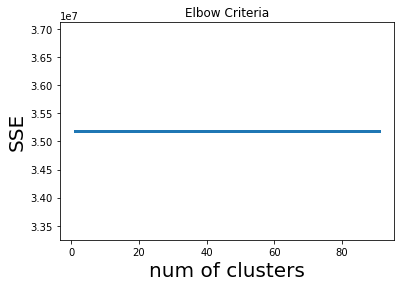

In [22]:
Ks = np.arange(1, 100, 10)
km = [AgglomerativeClustering(n_clusters=i, compute_distances=True) for i in Ks]
score = [sum(k.fit(X).distances_**2) for k in km]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('SSE', size=20)
plt.plot(Ks, score, lw=3);

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.